In [1]:
from mdcrow import MDCrow

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-09
time: 10:35:56


In [3]:
model='gpt-4-turbo-2024-04-09'

In [4]:
mda = MDCrow(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    use_memory=False, 
    top_k_tools="all"
)

print("LLM: ", mda.llm.model_name,"\nTemperature: ", mda.llm.temperature)

LLM:  gpt-4-turbo-2024-04-09 
Temperature:  0.1


In [5]:
prompt = 'Simulate protein 1ZNI at 300 K for 1 ns and calculate the RMSD.'
answer = mda.run(prompt)

Thought: To simulate the protein 1ZNI at 300 K for 1 ns and calculate the RMSD, I need to first set up and run the simulation using the appropriate molecular dynamics tools. After the simulation, I will compute the RMSD using the results obtained.

Action:
```json
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1ZNI",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "constraintTolerance": 0.00001,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / picoseconds",
            "Timestep": "0.002 * picoseconds"
        },
        "simulation_params": {
            "Ensemble": "NVT",

In [6]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 614.42 minutes


# Confirm the files were downloaded/made and check the plots

In [7]:
registry = mda.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_103614, 1ZNI_103634, top_sim0_103647, top_sim0_110355, sim0_110355, rec0_110407, rec1_110407, rec2_110407, rmsd_110355, fig0_205013


In [8]:
# ensure all files are in path registry
assert all(n in all_names for n in ['1ZNI', 'rmsd', 'sim0', 'top_sim0', 'fig0']), "Not all file ids are present in path registry"

In [9]:
# let's see if we can't grab the plot
import re
import os
match = re.search(r"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

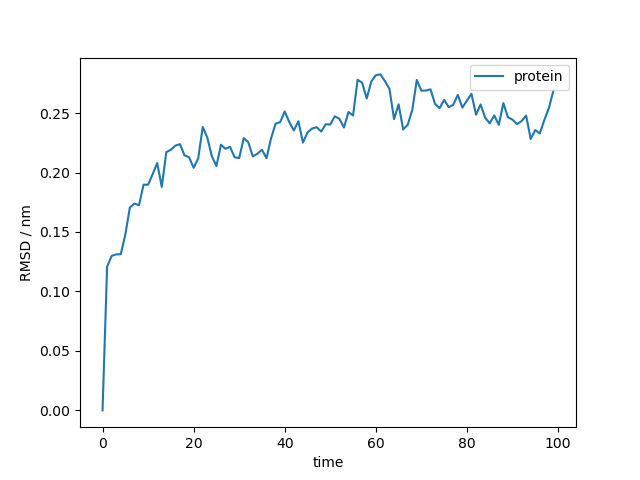

In [10]:
from IPython.display import Image

Image(filename=plot_path)

# Experiment Result:

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. No hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅
6. Number of steps completed: 3
7. % steps completed: 100️%